# Coding neural net from scratch

Based on notebook 00 from NYU DS-GA 1008

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Define two vectors (lists): input my_x, weights my_w
my_x = [0, 1, 1]
my_w = [-10, 10, 5]

In [33]:
# Multiply two lists element wise
def mul(a, b):
    """
    return a list c, same length as a, element c[i] = a[i] * b[i]
    "len(list)" and "[0] * n" may be useful
    """
    return np.asarray([ai*bi for ai, bi in zip(a,b)])

In [34]:
# Test mul() function
mul(my_x, my_w)

array([ 0, 10,  5])

In [35]:
# Define a scalar: bias b
my_b = -5

In [36]:
# Neuron linear (internal) potential
def linear_neuron(x, weights, bias):
    """
    return a scalar value representing a scalar neuron
    "sum(list)" computes the sum of the elements in a list
    """
    return np.sum([xi*weight for xi, weight in zip(x, weights)]) + bias

In [37]:
# Test linear_neuron() function
linear_neuron(my_x, my_w, my_b)

10

In [38]:
def sigmoid(z):
    """
    return the logistic sigmoid (use exp())
    """
    return (1 + np.exp(-z))**-1

In [39]:
# Try out σ() for different z values
for z in (-5, 0, 5): print(sigmoid(z))

0.0066928509242848554
0.5
0.9933071490757153


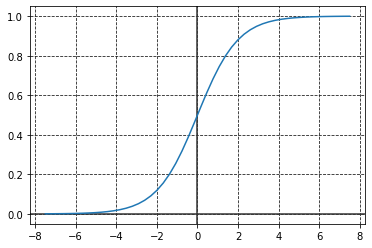

In [40]:
# Get a pair of axis and grid lines centred in (0, 0)
plt.axhline(c='.2'); plt.axvline(color='.2')
plt.grid(c='.1', ls='--')

# Plot across a span of numbers
z = np.linspace(-7.5, 7.5)
plt.plot(z, sigmoid(z));

In [41]:
# Full neuron function
def neuron(x, weights, bias):
    """
    Return a classical neuron output (reuse code above)
    """
    return sigmoid(linear_neuron(x, weights, bias))

In [42]:
# Test neuron() function
neuron(my_x, my_w, my_b)

0.9999546021312976

In [56]:
def or_neuron(x):
    """
    Return x1 OR x2 (x1 + x2)
    """
    return neuron(x, np.asarray([2, 2]), -1)

In [57]:
# Defina a collection of inputs to test OR and AND
my_x_collection = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]

In [58]:
print('Checking OR neuron output')
for my_x in my_x_collection:
    z = or_neuron(my_x)
    print(my_x, f'{z:.3f} {z > 0.5}')

Checking OR neuron output
[0, 0] 0.269 False
[0, 1] 0.731 True
[1, 0] 0.731 True
[1, 1] 0.953 True


In [59]:
# Package AND neuron weights and bias
def and_neuron(x):
    """
    Return x1 AND x2 (x1 * x2)
    """
    return neuron(x, np.asarray([1,1]), -2)

In [64]:
print('Checking AND neuron output')
for my_x in my_x_collection:
    z = and_neuron(my_x)
    print(my_x, f'{z:.3f} {z >= 0.5}')

Checking AND neuron output
[0, 0] 0.119 False
[0, 1] 0.269 False
[1, 0] 0.269 False
[1, 1] 0.500 True


In [61]:
# Package NOT neuron weight and bias
def not_neuron(x):
    """
    Return NOT x1 (x1_)
    """
    return neuron([x[0], 1 - x[0]], [-1, 1], 0)

In [63]:
print('Checking NOT neuron output')
for my_x in [[0], [1]]:
    z = not_neuron(my_x)
    print(my_x, f'{z:.3f} {z > 0.5}')

Checking NOT neuron output
[0] 0.731 True
[1] 0.269 False


In [65]:

# Combine OR, AND, and NOT into a XOR neuron
def xor_neuron(x):
    """
    Return x1_ * x2 + x1 * x2_
    """
    return not_neuron([x[0]])*x[1] + x[0]*not_neuron([x[1]])

In [67]:
print('Checking XOR neuron output')
for my_x in my_x_collection:
    z = xor_neuron(my_x)
    print(my_x, f'{z:.3f} {z > 0.7}')

Checking XOR neuron output
[0, 0] 0.000 False
[0, 1] 0.731 True
[1, 0] 0.731 True
[1, 1] 0.538 False


In [70]:
# Combine a XOR and an AND into a half-adder
# half-adder outputs the vector (sum % 2, carry bit) == (XOR, AND)
def half_adder(x):
    return np.array([xor_neuron(x), and_neuron(x)])

In [100]:
print('Checking half-adder neuron output: SUM  CARRY')
for my_x in my_x_collection:
    z = half_adder(my_x)
    print(my_x, f'{np.around(z, 3)}\t\t   {z[0] >= 0.5} {z[1] >= 0.5}')

Checking half-adder neuron output: SUM  CARRY
[0, 0] [0.    0.119]		   False False
[0, 1] [0.731 0.269]		   True False
[1, 0] [0.731 0.269]		   True False
[1, 1] [0.538 0.5  ]		   True True


In [94]:
# Combine two half-adders and an OR into a (full) adder
def adder(x):
    S1, C1 = half_adder(x[:2])
    
    # Form second layer input
    a1 = np.array([S1, x[2]])
    S2, C2 = half_adder(a1)
    
    C3 = or_neuron(np.array([C1, C2]))
    return np.array([S2, C3])    

In [103]:
adder_collection = [
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [1,1,0],
    [1,1,1]
]

print('Checking adder neuron output: SUM  CARRY')
for my_x in adder_collection:
    z = adder(my_x)
    print(my_x, f'{np.around(z, 3)}\t      {z[0] > 0.5}  {z[1] > 0.5}')

Checking adder neuron output: SUM  CARRY
[0, 0, 0] [0.    0.372]	      False  False
[0, 0, 1] [0.731 0.444]	      True  False
[0, 1, 0] [0.534 0.494]	      True  False
[1, 1, 0] [0.393 0.593]	      False  True
[1, 1, 1] [0.626 0.684]	      True  True
